In [1]:
from astropy.io import fits

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from astropy.stats import sigma_clipped_stats
%matplotlib inline

## 1) Exploring LC Files

In [3]:
lc_23sep = fits.open('Data/ch2_xsm_20210923_v1_level2.lc')
lc_23sep.info()

Filename: Data/ch2_xsm_20210923_v1_level2.lc
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      15   ()      
  1  RATE          1 BinTableHDU     64   84280R x 4C   [D, E, E, E]   


In [4]:
header1_23sep = lc_23sep[0].header
header1_23sep

SIMPLE  =                    T / file does conform to FITS standard             
BITPIX  =                   16 / number of bits per data pixel                  
NAXIS   =                    0 / number of data axes                            
EXTEND  =                    T / FITS dataset may contain extensions            
COMMENT   FITS (Flexible Image Transport System) format is defined in 'Astronomy
COMMENT   and Astrophysics', volume 376, page 359; bibcode: 2001A&A...376..359H 
MISSION = 'CHANDRAYAAN-2'      / Name of mission/satellite                      
TELESCOP= 'CH-2_ORBITER'       / Name of mission/satellite                      
INSTRUME= 'CH2_XSM '           / Name of Instrument/detector                    
ORIGIN  = 'PRLPOC  '           / Source of FITS file                            
CREATOR = 'xsmgenlc '          / Creator of file                                
FILENAME= 'ch2_xsm_20210923_v1_level2.lc' / Name of file                        
CONTENT = 'Light curve'     

In [5]:
header2_23sep = lc_23sep[1].header
header2_23sep

XTENSION= 'BINTABLE'           / binary table extension                         
BITPIX  =                    8 / 8-bit bytes                                    
NAXIS   =                    2 / 2-dimensional binary table                     
NAXIS1  =                   20 / width of table in bytes                        
NAXIS2  =                84280 / number of rows in table                        
PCOUNT  =                    0 / size of special data area                      
GCOUNT  =                    1 / one data group (required keyword)              
TFIELDS =                    4 / number of fields in each row                   
TTYPE1  = 'TIME    '           / label for field   1                            
TFORM1  = 'D       '           / data format of field: 8-byte DOUBLE            
TTYPE2  = 'RATE    '           / label for field   2                            
TFORM2  = 'E       '           / data format of field: 4-byte REAL              
TTYPE3  = 'ERROR   '        

The 2nd header file contains count rate, and hence is the more important file.

In [6]:
lc_24sep = fits.open('Data/ch2_xsm_20210924_v1_level2.lc')
lc_28sep = fits.open('Data/ch2_xsm_20210928_v1_level2.lc')
lc_27sep = fits.open('Data/ch2_xsm_20210927_v1_level2.lc')
lc_29sep = fits.open('Data/ch2_xsm_20210929_v1_level2.lc')

## 2) Lightcurves

In [7]:
data_23sep = lc_23sep[1].data
data_23sep, data_23sep.shape

(FITS_rec([(1.49126401e+08, 494.83276, 22.244837, 1.),
           (1.49126402e+08, 518.2688 , 22.765518, 1.),
           (1.49126403e+08, 504.4697 , 22.460403, 1.), ...,
           (1.49212797e+08, 376.00684, 19.390896, 1.),
           (1.49212798e+08, 374.12167, 19.342226, 1.),
           (1.49212799e+08, 401.34076, 20.033491, 1.)],
          dtype=(numpy.record, [('TIME', '>f8'), ('RATE', '>f4'), ('ERROR', '>f4'), ('FRACEXP', '>f4')])),
 (84280,))

In [8]:
data_23sep['RATE']

array([494.83276, 518.2688 , 504.4697 , ..., 376.00684, 374.12167,
       401.34076], dtype=float32)

In [9]:
lc = [lc_23sep, lc_24sep, lc_27sep, lc_28sep, lc_29sep];
headers = [l[1].header for l in lc];
data = [l[1].data for l in lc]

Data is stored as a numpy record with 84280 entries, and each entry contains 4 fields:
1) Time
2) Count Rate
3) Error in count rate
4) FracExp


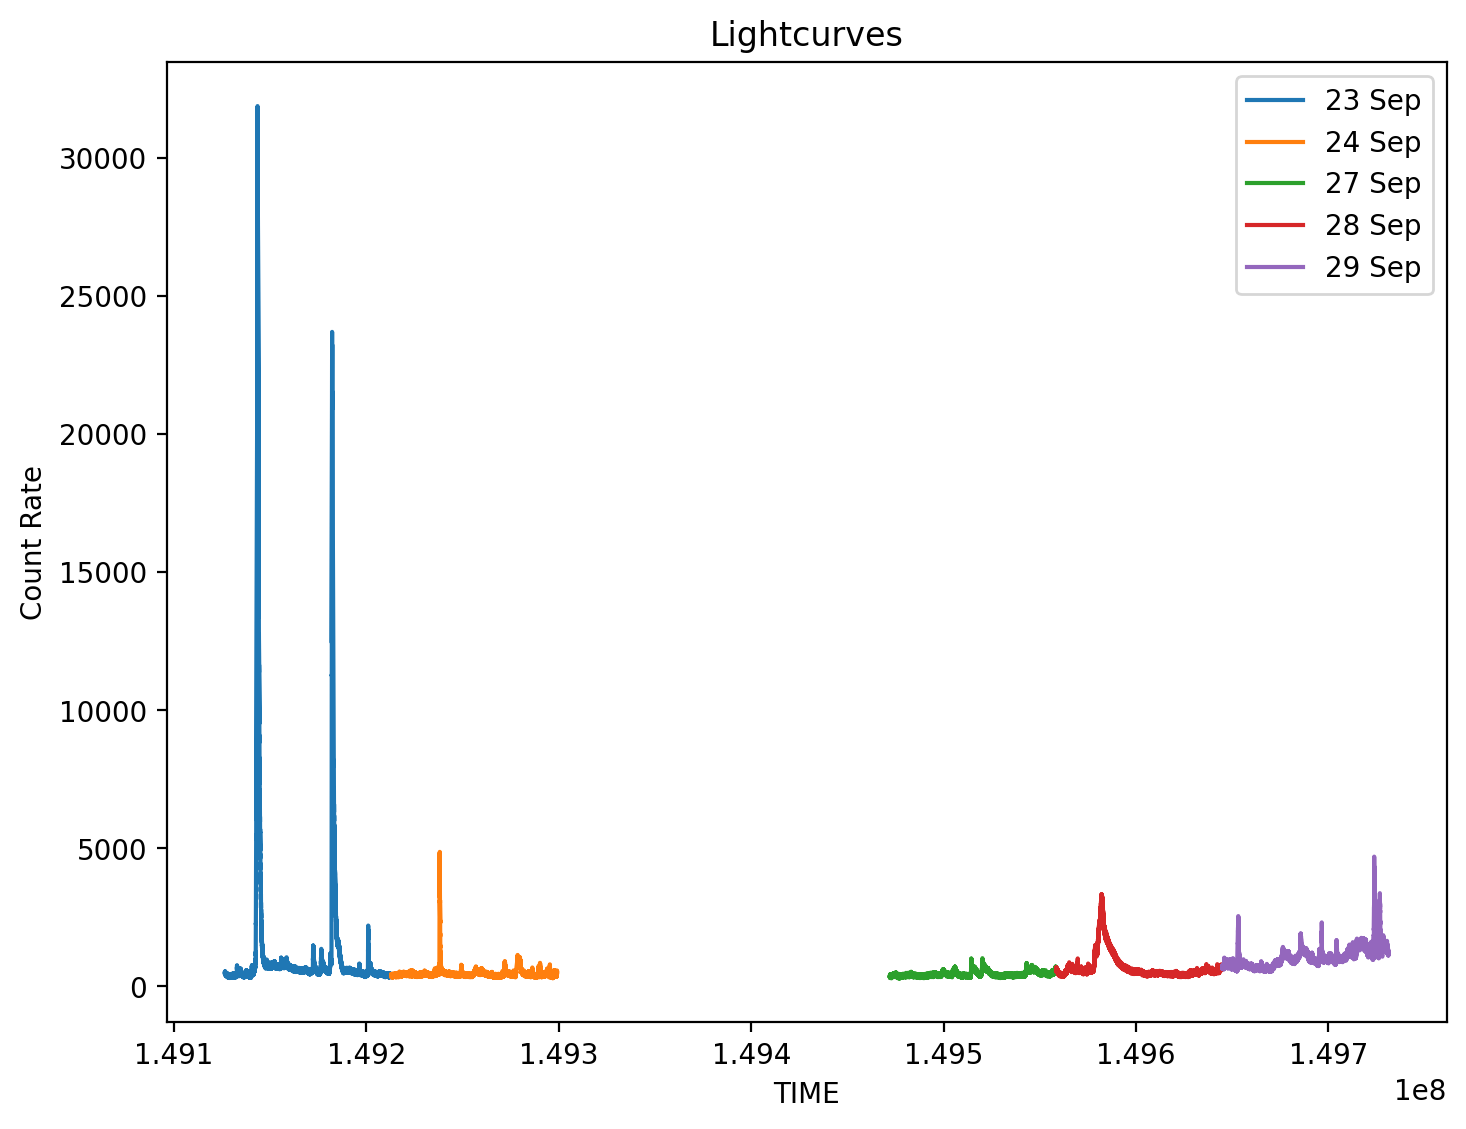

In [18]:
fig = plt.figure(dpi=200)
dates = ['23 Sep', '24 Sep', '27 Sep', '28 Sep', '29 Sep']
ax = fig.add_axes([0, 0, 1, 1])
for i in range(5):
    ax.plot(data[i]['TIME'], data[i]['RATE'])
    ax.set_title('Lightcurves')
    ax.set_xlabel('TIME')
    ax.set_ylabel('Count Rate')
ax.legend(dates);

Peculiarity in the time axis is that we did not take measurements on 25th and 26th September, and hence that data is missing.